<a href="https://colab.research.google.com/github/Bhavin52/Python_Statistics/blob/main/MultiLinear_regression_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

In [86]:
startUps = pd.read_csv("/content/50_Startups.csv")
startUps.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [87]:
startUps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [88]:
startUps.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [90]:
startUps.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


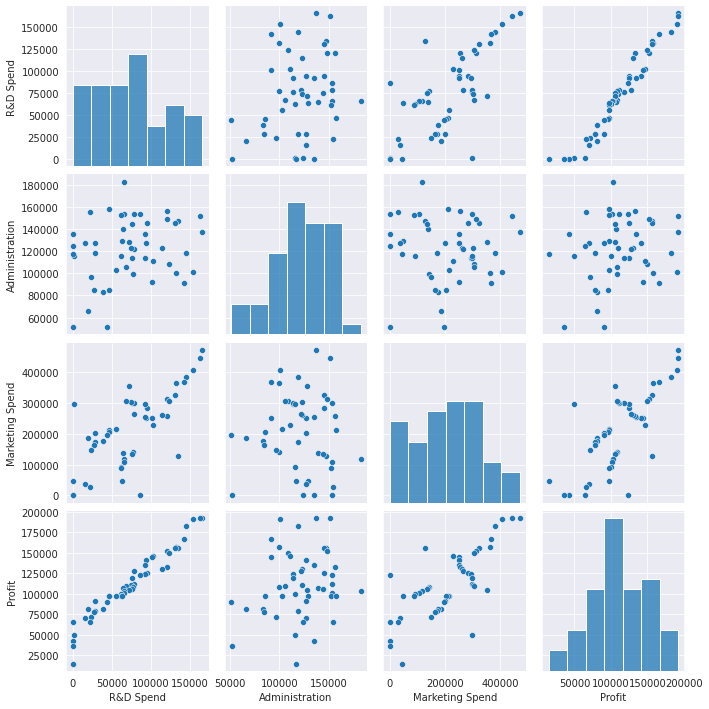

In [91]:
sns.set_style(style='darkgrid')
sns.pairplot(startUps)

In [92]:
startUps = pd.DataFrame(startUps)
startUps.rename(columns = {'R&D Spend':'research'}, inplace = True)
startUps.rename(columns = {'Marketing Spend':'Marketing'}, inplace = True)

print("\nAfter modifying first column:\n", startUps.columns)



After modifying first column:
 Index(['research', 'Administration', 'Marketing', 'State', 'Profit'], dtype='object')


In [94]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~research+Administration+Marketing',data=startUps).fit()

In [ ]:
model.params

In [102]:
print(model.tvalues, '\n', model.pvalues) #Administration and Marketing Is Influance our model 

Intercept          7.626218
research          17.846374
Administration    -0.525507
Marketing          1.655077
dtype: float64 
 Intercept         1.057379e-09
research          2.634968e-22
Administration    6.017551e-01
Marketing         1.047168e-01
dtype: float64


In [97]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [111]:
simple_admin=smf.ols("Profit~Administration",data=startUps).fit()
simple_admin.tvalues , simple_admin.pvalues


(Intercept         3.040044
 Administration    1.419493
 dtype: float64, Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [112]:
simple_marketing=smf.ols("Profit~Marketing",data=startUps).fit()
simple_marketing.tvalues , simple_marketing.pvalues

(Intercept    7.808356
 Marketing    7.802657
 dtype: float64, Intercept    4.294735e-10
 Marketing    4.381073e-10
 dtype: float64)

In [113]:
multi_am=smf.ols("Profit~Marketing+Administration",data=startUps).fit()
multi_am.tvalues , multi_am.pvalues

(Intercept         1.142741
 Marketing         8.281039
 Administration    2.467779
 dtype: float64, Intercept         2.589341e-01
 Marketing         9.727245e-11
 Administration    1.729198e-02
 dtype: float64)

In [110]:
# Model Validation 
# 1)Collinearity check 2)Residual Analysis
 

In [114]:
# 1) Collinearity Problem Check
# formula VIF = 1/(1-Rsquare) for all independent variables

In [120]:
rsq_research=smf.ols("research~Administration+Marketing",data=startUps).fit().rsquared
vif_res=1/(1-rsq_research)

rsq_admin=smf.ols("Administration~research+Marketing",data=startUps).fit().rsquared
vif_admin=1/(1-rsq_admin)

rsq_marketing=smf.ols("Marketing~research+Administration",data=startUps).fit().rsquared
vif_marketing=1/(1-rsq_marketing)

d1 = {'Variables':['research','Administration','Marketing'],'VIF':[vif_res,vif_admin,vif_marketing]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

#no Independent variable has VIF>20 ,SO no collinarity consider all independent variables

,Variables,VIF
0,research,2.468903
1,Administration,1.175091
2,Marketing,2.326773


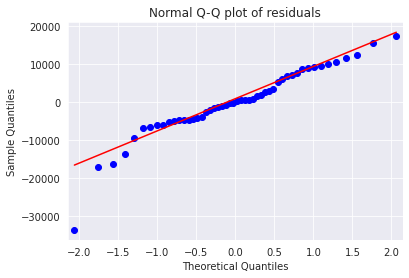

In [124]:
# Residual check
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [122]:
list(np.where(model.resid<-30000))

[array([49])]